In [3]:
import pandas as pd
import math
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn import tree
import pydotplus
from subprocess import call
import matplotlib.pyplot as plt


pd.options.mode.chained_assignment = None

data = pd.read_csv("dataset/heart.csv", index_col=0)

In [4]:
refactor_labels = []
for i in data.age:
    if np.remainder(i, 10) == 0:
        refactor_labels.append(i // 10 - 1)
    else:
        refactor_labels.append(i // 10)
# print(refactor_labels)

data['age_enc'] = pd.DataFrame(refactor_labels)

In [5]:
cols_needs_encode = data.select_dtypes(['object', 'bool']).columns
label_encoder = LabelEncoder()   
for col in cols_needs_encode:
    data['encoded_'+col] = label_encoder.fit_transform(data[col])
encoded_data = data.select_dtypes(exclude=['object', 'bool'])
# print(encoded_data)
encoded_data.drop(columns='age', inplace=True)

# print(encoded_data)



In [6]:
train, test = train_test_split(encoded_data, test_size=0.2)
train_data = train.drop(columns='encoded_target')
test_data = test.drop(columns='encoded_target')

train_target = train[['encoded_target']]
test_target = test[['encoded_target']]

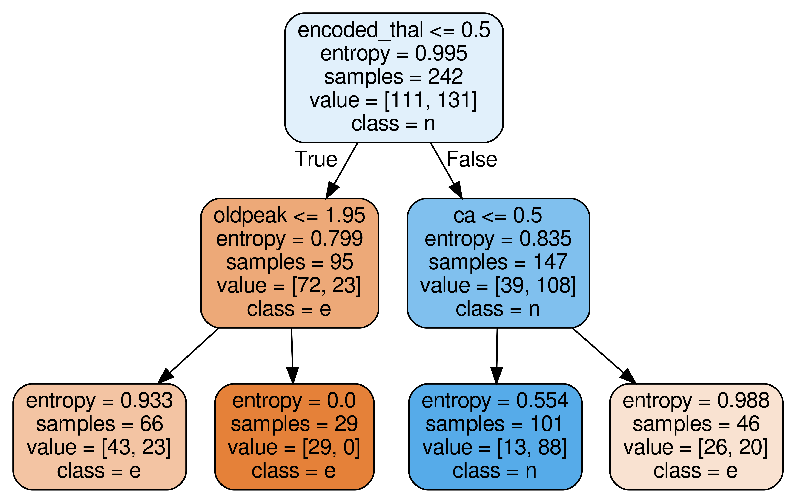

Accuracy is : 75.40983606557377 %


In [7]:
dtc = DecisionTreeClassifier(max_depth=2, min_samples_split=3, criterion="entropy")
dtc = dtc.fit(train_data, train_target)

dot_data = tree.export_graphviz(dtc, feature_names=train_data.columns.values,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True,
                                class_names='encoded_target',
                               proportion = False)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

test_target_prediction = dtc.predict(test_data)
print("Accuracy is : {} %".format(metrics.accuracy_score(test_target, test_target_prediction)*100))

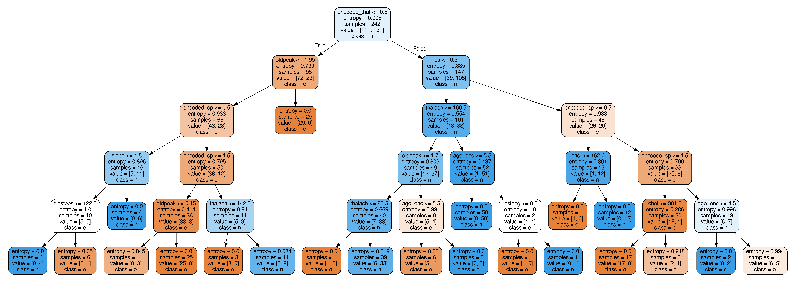

Accuracy is : 75.40983606557377 %


In [8]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=2, criterion="entropy")
dtc = dtc.fit(train_data, train_target)

dot_data = tree.export_graphviz(dtc, feature_names=train_data.columns.values,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True,
                                class_names='encoded_target',
                               proportion = False)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

test_target_prediction = dtc.predict(test_data)
print("Accuracy is : {} %".format(metrics.accuracy_score(test_target, test_target_prediction)*100))

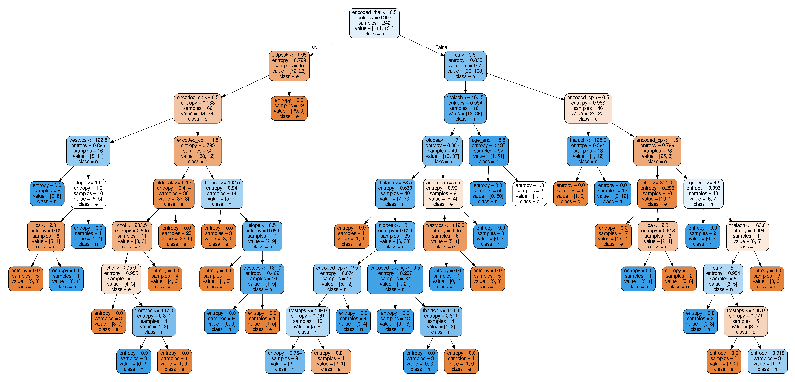

Accuracy is : 81.9672131147541 %


In [9]:
dtc = DecisionTreeClassifier(max_depth=8, min_samples_split=3, criterion="entropy")
dtc = dtc.fit(train_data, train_target)

dot_data = tree.export_graphviz(dtc, feature_names=train_data.columns.values,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True,
                                class_names='encoded_target',
                               proportion = False)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

test_target_prediction = dtc.predict(test_data)
print("Accuracy is : {} %".format(metrics.accuracy_score(test_target, test_target_prediction)*100))

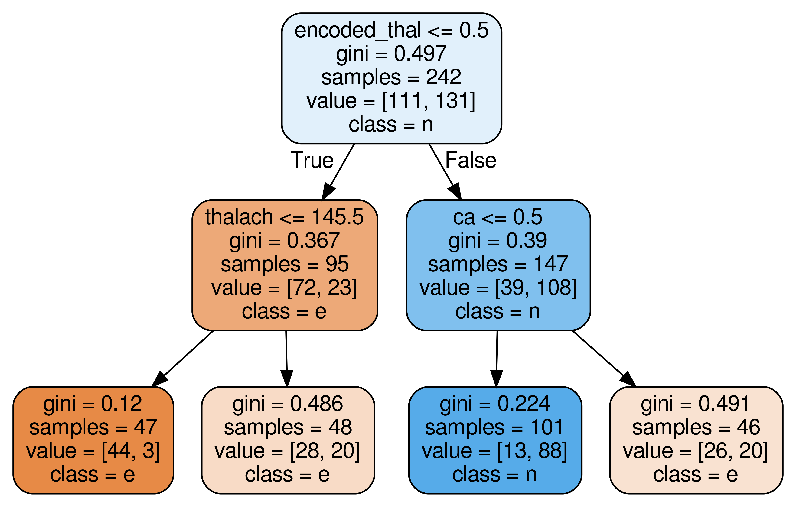

Accuracy is : 75.40983606557377 %


In [10]:
dtc = DecisionTreeClassifier(max_depth=2, min_samples_split=2, criterion="gini")
dtc = dtc.fit(train_data, train_target)

dot_data = tree.export_graphviz(dtc, feature_names=train_data.columns.values,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True,
                                class_names='encoded_target',
                               proportion = False)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();


test_target_prediction = dtc.predict(test_data)
print("Accuracy is : {} %".format(metrics.accuracy_score(test_target, test_target_prediction)*100))

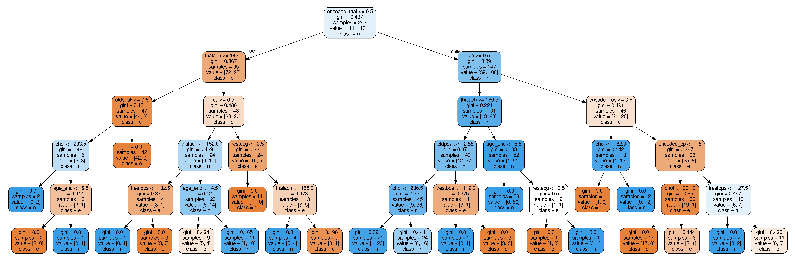

Accuracy is : 78.68852459016394 %


In [11]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=2, criterion="gini")
dtc = dtc.fit(train_data, train_target)

dot_data = tree.export_graphviz(dtc, feature_names=train_data.columns.values,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True,
                                class_names='encoded_target',
                               proportion = False)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

test_target_prediction = dtc.predict(test_data)
print("Accuracy is : {} %".format(metrics.accuracy_score(test_target, test_target_prediction)*100))

In [12]:
dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=5, criterion="gini")
dtc = dtc.fit(train_data, train_target)
test_target_prediction = dtc.predict(test_data)
print("Accuracy is : {} %".format(metrics.accuracy_score(test_target, test_target_prediction)*100))

Accuracy is : 77.04918032786885 %
